<a href="https://colab.research.google.com/github/JRiveraB23/SyS05/blob/main/Punto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Punto 3***
Punto incompleto, lo raye bastante y no medio

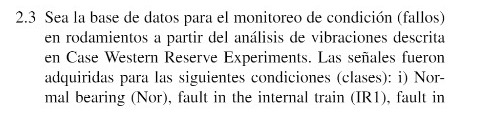

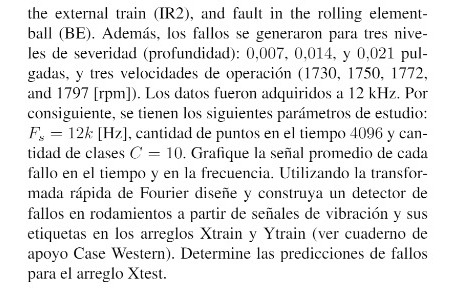

In [2]:
import scipy.io as sio
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import warnings
from sklearn.metrics import pairwise_distances
import matplotlib
from sklearn.model_selection import train_test_split
import pandas as pd

warnings.filterwarnings('ignore')

#Data downloaded for Google Drive:
FILEID="1hsUUQc0uKUOEIYY5F1RDFcCEVkug4P1T"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.confirm=([0-9A-Za-z_]+)./\1\n/p')&id="$FILEID -O datos.zip && rm -rf /tmp/cookies.txt
!unzip -odatos.zip
!dir
#Cargar datos:
path_='CaractCE.mat' #Case Western Database
dicX=sio.loadmat(path_)
#Mostrar las claves disponibles en el diccionario:

import scipy.io as sio

#Cargar los datos desde el archivo .mat:
path_='CaractCE.mat'
dicX=sio.loadmat(path_)
#Iterar a través de todas las claves y mostrarlas una por una:
for key in dicX:
    print(key)
#Iterar a través de las claves en el diccionario y mostrar los datos asociados a cada clave:
for key, value in dicX.items():
    print(f'Base de Datos: {key}')
    print(value)
    print('\n')
Xt=dicX['F']
print(Xt.shape)
Xt=dicX['F'] #Datos en el tiempo
Fs=12000 #Frecuencia de muestreo
Tl=Xt.shape[1]/Fs #Tamaño del segmento
print('X(t) shape:', Xt.shape)
print('Tiempo [s]', Tl)
Y=dicX['E']
Ytrue=Y[:,2] #Clases de fallos en los rodamientos
labels_ = ['NOR', 'IR1_0.007´´', 'IR1_0.014´´', 'IR1_0.021´´',
           'IR2_0.007´´', 'IR2_0.014´´', 'IR2_0.021´´',
           'BE_0.007´´', 'BE_0.014´´', 'BE_0.021´´'
           ] #Nombres de las clases

print(Ytrue.shape) #Etique membresia de los datos, diez posibles valores
print(np.unique(Ytrue))
#Partir datos para train y test:
Xtrain, Xtest, Ytrain, _=train_test_split(Xt, Ytrue, test_size=0.3)
print(f"Xtrain shape {Xtrain.shape}, Ytrain shape {Ytrain.shape}, Xtest shape{Xtest.shape}")
#Calcular el espectro de Fourier a Xtrain:
vf=np.fft.rfftfreq(Xtrain.shape[1], 1/Fs) #Freq vector
Xw=(abs(np.fft.rfft(Xtrain)))#FFT
Xw.shape
Xwt = abs(np.fft.rfft(Xtest))
vft = np.fft.rfftfreq(Xtest.shape[1],1/Fs)
#Graficar espectro para clases representativas:
sca_=MinMaxScaler()
Xw_=sca_.fit_transform(Xw.T).T
#red=TSNE(perplexity=15, n_components=2, random_state=123, learning_rate='auto', init='pca')
red=PCA(n_components=2)
Z=red.fit_transform(Xw_)
plt.scatter(Z[:, 0],Z[:, 1], c=Ytrain, label='Xtrain')
plt.colorbar()
plt.show()

--2023-10-28 03:30:51--  https://docs.google.com/uc?export=download&confirm=&id=1hsUUQc0uKUOEIYY5F1RDFcCEVkug4P1T
Resolving docs.google.com (docs.google.com)... 108.177.13.139, 108.177.13.101, 108.177.13.100, ...
Connecting to docs.google.com (docs.google.com)|108.177.13.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-1c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/48da0icjtbnldvri54mm2tfmqc1b9d6m/1698463800000/10344502555464772929/*/1hsUUQc0uKUOEIYY5F1RDFcCEVkug4P1T?e=download&uuid=895a1b88-89cb-48c2-a55a-0d1b3d51e59c [following]
--2023-10-28 03:30:51--  https://doc-14-1c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/48da0icjtbnldvri54mm2tfmqc1b9d6m/1698463800000/10344502555464772929/*/1hsUUQc0uKUOEIYY5F1RDFcCEVkug4P1T?e=download&uuid=895a1b88-89cb-48c2-a55a-0d1b3d51e59c
Resolving doc-14-1c-docs.googleusercontent.com (doc-14-1c-docs.googleusercontent.com)... 172.217.193.132, 

FileNotFoundError: ignored